In [1]:
import pandas as pd

In [7]:
df_transaction = pd.read_csv('/Users/hapresent/Desktop/데이터톤/0806/transaction_customer_pricelabel.csv')

In [9]:
df_transaction

,customer_id,dominant_price_label,count
0,43202,middle price,405
1,29496,middle price,382
2,82237,middle price,346
3,10167,middle price,340
4,69740,middle price,327
...,...,...,...
50237,24769,middle price,1
50238,82253,middle price,1
50239,24774,middle price,1
50240,82251,high price,1


In [43]:
df_transaction['customer_id'].nunique()

50242

In [11]:
df_add_to_cart = pd.read_csv('/Users/hapresent/Desktop/데이터톤/0806/add_to_cart_customerprice_label.csv')

In [13]:
df_add_to_cart

,customer_id,cart_price_label,count
0,3.0,middle price,84
1,8.0,middle price,9
2,9.0,middle price,10
3,11.0,low price,2
4,15.0,middle price,11
...,...,...,...
50699,99992.0,middle price,14
50700,99995.0,middle price,37
50701,99997.0,middle price,3
50702,99998.0,middle price,16


In [45]:
df_add_to_cart['customer_id'].nunique()

50704

In [51]:
df_merge = pd.merge(
    df_add_to_cart[['customer_id', 'cart_price_label']],
    df_transaction[['customer_id', 'dominant_price_label']],
    on='customer_id',
    how='right'
)


In [57]:
#결제 성공 고객에 한해 장바구니 구매 성향 데이터 병합

In [55]:
df_merge

,customer_id,cart_price_label,dominant_price_label
0,43202.0,middle price,middle price
1,29496.0,middle price,middle price
2,82237.0,middle price,middle price
3,10167.0,middle price,middle price
4,69740.0,middle price,middle price
...,...,...,...
50237,24769.0,middle price,middle price
50238,82253.0,middle price,middle price
50239,24774.0,middle price,middle price
50240,82251.0,high price,high price


In [59]:
df_merge.rename(columns={
    'dominant_price_label': 'transaction_price_label'
}, inplace=True)


In [63]:
df_merge
#customer_id : 고객 id
#cart_price_label: 장바구니 구매 성향
#transaction_price_label : 결제 기반 구매 성향 

,customer_id,cart_price_label,transaction_price_label
0,43202.0,middle price,middle price
1,29496.0,middle price,middle price
2,82237.0,middle price,middle price
3,10167.0,middle price,middle price
4,69740.0,middle price,middle price
...,...,...,...
50237,24769.0,middle price,middle price
50238,82253.0,middle price,middle price
50239,24774.0,middle price,middle price
50240,82251.0,high price,high price


In [67]:
51844 in df_merge['customer_id'].values


True

In [69]:
df_merge[df_merge['customer_id'] == 51844]


,customer_id,cart_price_label,transaction_price_label,label_changed
30523,51844.0,NaN,middle price,True


In [71]:
df_merge = df_merge[df_merge['customer_id'] != 51844]

In [75]:
df_merge

,customer_id,cart_price_label,transaction_price_label,label_changed
0,43202.0,middle price,middle price,False
1,29496.0,middle price,middle price,False
2,82237.0,middle price,middle price,False
3,10167.0,middle price,middle price,False
4,69740.0,middle price,middle price,False
...,...,...,...,...
50237,24769.0,middle price,middle price,False
50238,82253.0,middle price,middle price,False
50239,24774.0,middle price,middle price,False
50240,82251.0,high price,high price,False


In [79]:
df_merge.to_csv('/Users/hapresent/Desktop/데이터톤/0806/customer_price_label_change.csv',index=False)

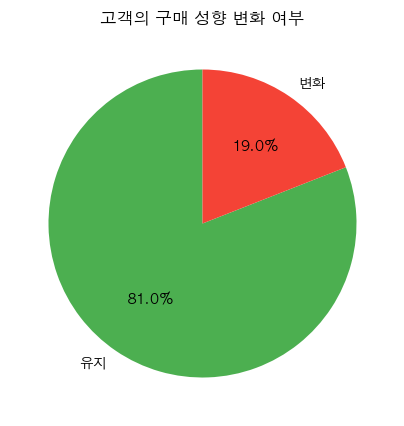

In [98]:
import matplotlib.pyplot as plt
from matplotlib import rc  
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False 

label_counts = df_merge['label_changed'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(label_counts, labels=['유지', '변화'], autopct='%.1f%%', startangle=90, colors=['#4caf50', '#f44336'])
plt.title('고객의 구매 성향 변화 여부')
plt.show()


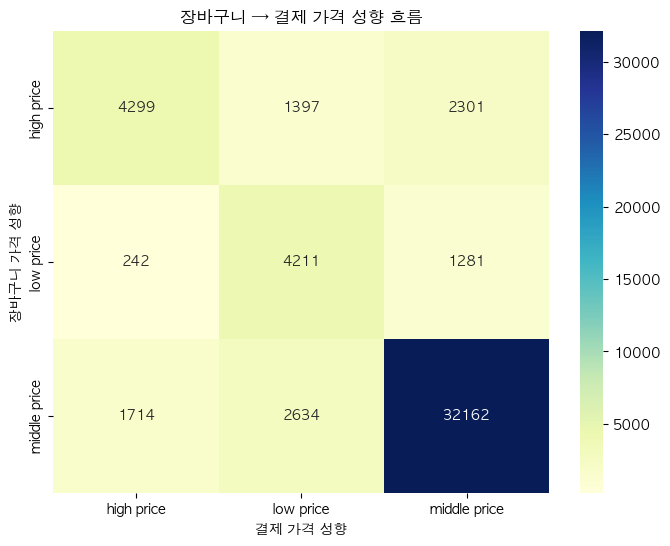

In [100]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 교차표 생성
pivot = pd.crosstab(df_merge['cart_price_label'], df_merge['transaction_price_label'])

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('장바구니 → 결제 가격 성향 흐름')
plt.xlabel('결제 가격 성향')
plt.ylabel('장바구니 가격 성향')
plt.show()


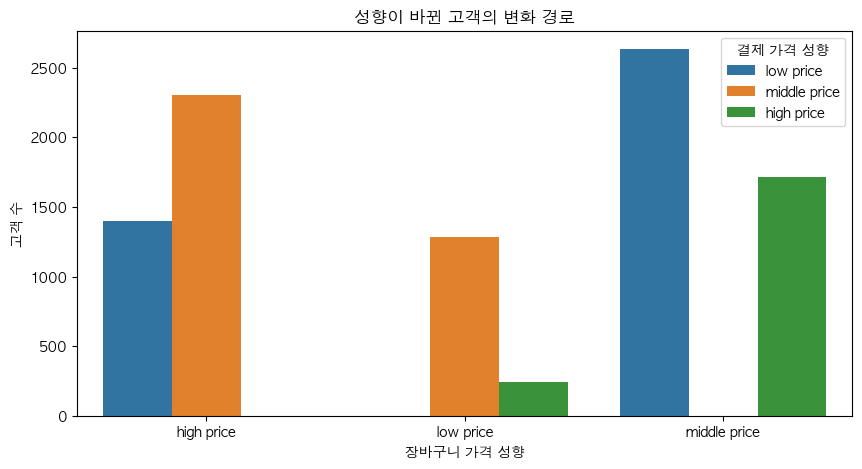

In [102]:
changed = df_merge[df_merge['label_changed']]

change_paths = changed.groupby(
    ['cart_price_label', 'transaction_price_label']
).size().reset_index(name='count')

# 막대그래프
plt.figure(figsize=(10, 5))
sns.barplot(data=change_paths, x='cart_price_label', y='count', hue='transaction_price_label')
plt.title('성향이 바뀐 고객의 변화 경로')
plt.xlabel('장바구니 가격 성향')
plt.ylabel('고객 수')
plt.legend(title='결제 가격 성향')
plt.show()


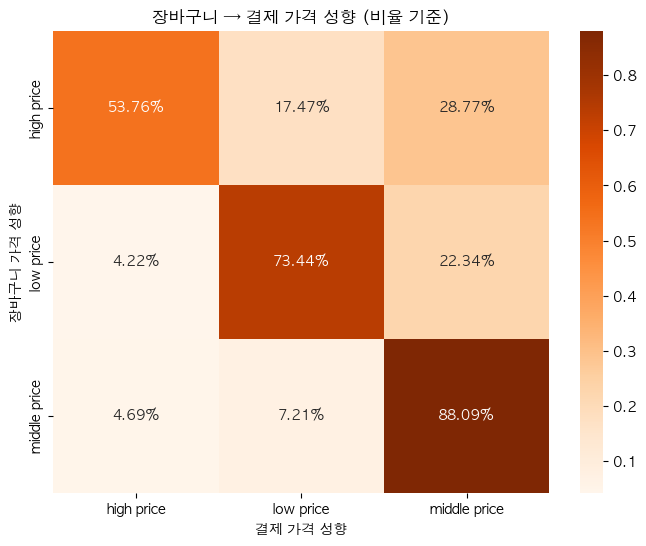

In [108]:
# 행 기준 비율
pivot_ratio = pivot.div(pivot.sum(axis=1), axis=0)

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_ratio, annot=True, fmt='.2%', cmap='Oranges')
plt.title('장바구니 → 결제 가격 성향 (비율 기준)')
plt.xlabel('결제 가격 성향')
plt.ylabel('장바구니 가격 성향')
plt.show()
